<a href="https://colab.research.google.com/github/Sweta-Das/ML-with-Python/blob/main/2_4_Naive_Bayes_Classifiers_%26_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classifier

3 kinds of Naive Bayes Classifier in scikit-learn. <br/>
- Gaussian NB (continuous data)
- Bernoulli NB (binary data)
- Multinomial NB (countable data)<br/>
Bernoulli & Multinomial NB are mostly used in text classification.<br/>
<br/>

Understanding Bernoulli NB Classifier:

In [ ]:
import numpy as np

X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

Here, we've 4 data points, with 4 binary features each. There're 2 classes: 0 & 1.

In [ ]:
counts = {}
for label in np.unique(y):
  # iterating over each class
  # counting (sum) entries of 1 per feature

  counts[label] = X[y == label].sum(axis=0)

print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# Decision Trees
Example

In [ ]:
!pip install mglearn

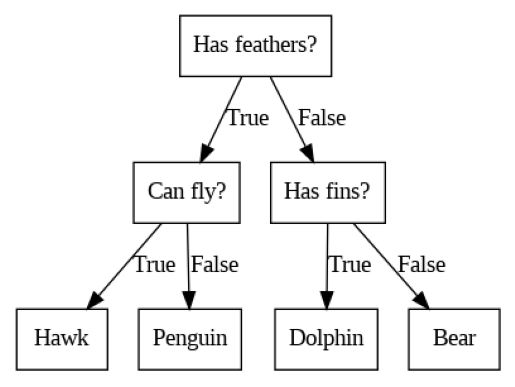

In [ ]:
import mglearn

mglearn.plots.plot_animal_tree()

## Decision Tree Classification
Buiding Decision Tree on Breast Cancer Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

# Loading the dataset
cancer = load_breast_cancer()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify= cancer.target,
                                                    random_state= 42)

In [ ]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

random_state in the tree is fixed which is used for tie-breaking internally.

In [ ]:
# Train-test accuracy score
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Training set accuracy is 100% because leaves are pure.<br/>

### Pre-pruning of data
(a) Tree with fixed depth

In [ ]:
# Setting max depth to 4
tree = DecisionTreeClassifier(max_depth= 4, random_state= 0)
tree.fit(X_train, y_train)

# Train-test accuracy score
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [ ]:
# Analyzing decision tree
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names= ["malignant", "benign"],
                feature_names= cancer.feature_names, impurity= False,
                filled= True)

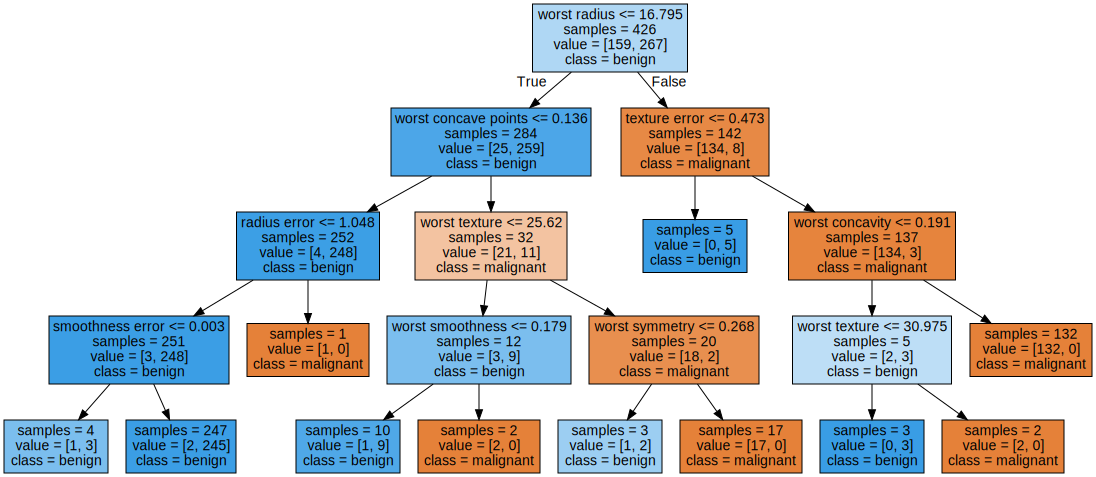

In [ ]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

samples: gives the no. of samples in that node<Br/>
value: no. of samples per class

### Feature Importance in Trees
Feature importance rates how important each feature is for the decision a tree makes. It's a number between 0 & 1 for each feature.

In [ ]:
print("Feature importances: \n{}".format(tree.feature_importances_))

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


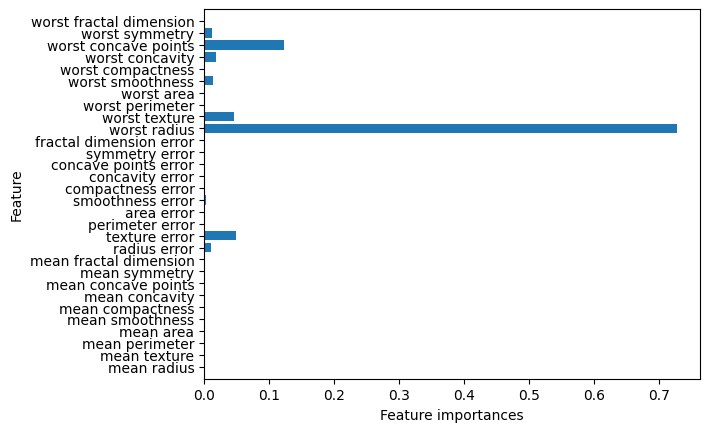

In [ ]:
# Visualizing feature importances

import matplotlib.pyplot as plt

def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align= 'center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importances")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

It shows that "worst_split" feature is the most important feature.

Feature importances: [0. 1.]


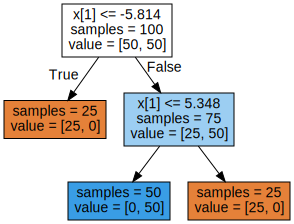

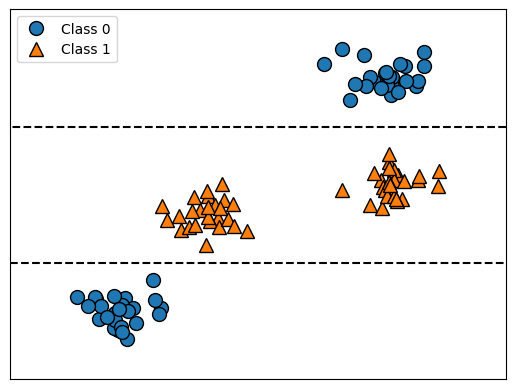

In [ ]:
# Non-monotonous relationship between class label & features of dataset
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

From decision tree, only X[1] is used considering that it contains all the info. But the relation between X[1] & the output class is not monotonous i.e., we can't say "a high value of X[1] means class 0, & a low value means class 1" (or vice-versa).

## Decision Tree Regression
Building decision tree to predict future RAM prices based on data till 2000 A.D.

Text(0, 0.5, 'Price in $/Mbyte')

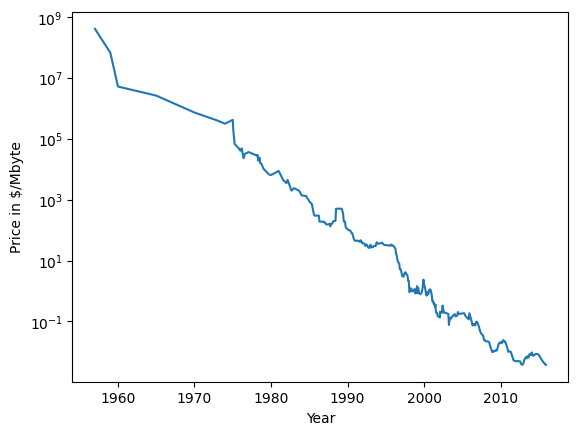

In [ ]:
import os
import pandas as pd

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
                                      "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price) # logarithmic scale of y-axis
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")